In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import xlrd


In [2]:
#importing all the datasets given

cab_df = pd.read_csv("C:\Shwetha\Data_Glacier_Internship\DataSets-main\Cab_Data.csv")
city_df = pd.read_csv('C:\Shwetha\Data_Glacier_Internship\DataSets-main\City.csv')
transid_df = pd.read_csv('C:\Shwetha\Data_Glacier_Internship\DataSets-main\Transaction_ID.csv')
custid_df = pd.read_csv('C:\Shwetha\Data_Glacier_Internship\DataSets-main\Customer_ID.csv')

In [3]:
#Check the shape of each dataset
cab_df.shape

(359392, 7)

In [4]:
city_df.shape

(20, 3)

In [5]:
transid_df.shape

(440098, 3)

In [6]:
custid_df.shape

(49171, 4)

In [7]:
#check details of each dataset and review
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [8]:
cab_df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [9]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [10]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [11]:
custid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
custid_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
transid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [14]:
transid_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
#check for any nullvalues in all the datasets

cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [16]:
city_df.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [17]:
transid_df.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [18]:
custid_df.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [19]:
#check for any duplicate values in all the datasets
cab_df.duplicated().sum()

0

In [20]:
city_df.duplicated().sum()

0

In [21]:
transid_df.duplicated().sum()

0

In [22]:
custid_df.duplicated().sum()

0

In [23]:
#There are no null values and duplicate values in all the datasets.#

In [24]:
#Next we will be doing data cleaning by changing the datatypes of required coloumns in the datasets#


In [25]:
cab_df['Date of Travel'].shape

(359392,)

In [26]:
#Converting the Date format from serial number to datetime for Date of Travel column
for i in range(359392):
    excel_date=[]
    excel_date = cab_df.iloc[i,1]
    datetime_obj = xlrd.xldate_as_datetime(excel_date, 0)
    dateobj = datetime_obj.date()
    str_date = dateobj.isoformat()
    cab_df.iloc[i,1]=str_date

In [27]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [28]:
cab_df.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [29]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [30]:
#Converting the datatype of Date of Travel to Datetime from Object
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'])

In [31]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [32]:
#removing commas in Population and Users to convert it to integer

city_df.Population = [city_df.Population[i].replace(",", "") for i in range(len(city_df))]
city_df.Users = [city_df.Users[i].replace(",", "") for i in range(len(city_df))]

In [33]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [34]:
#Converting Population and Users to Interger after removeing commas
city_df.Population = city_df.Population.astype('int64')
city_df.Users = city_df.Users.astype('int64')

In [35]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [36]:
#Merge the datasets required to create the master data

df1=pd.merge(cab_df,transid_df,on='Transaction ID')

In [37]:
df1.shape

(359392, 9)

In [38]:
df2=pd.merge(df1,custid_df,on='Customer ID')

In [39]:
df2.shape

(359392, 12)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [41]:
#Check if any null values and duplicates after merging datasets into master data

df2.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [42]:
df2.duplicated().sum()

0

In [43]:
df2.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242


In [44]:
# we will split the city coloumn in both city dataset and masterdata into city and state coloumns

In [45]:
city_df['State']=city_df['City'].copy()

In [46]:
State = city_df['State'].str[-2:]
city_df['State'] = State
City=city_df['City'].str[:-3]
city_df['City']=City

In [47]:
city_df.head(20)

,City,Population,Users,State
0,NEW YORK,8405837,302149,NY
1,CHICAGO,1955130,164468,IL
2,LOS ANGELES,1595037,144132,CA
3,MIAMI,1339155,17675,FL
4,SILICON VAL,1177609,27247,EY
5,ORANGE COU,1030185,12994,TY
6,SAN DIEGO,959307,69995,CA
7,PHOENIX,943999,6133,AZ
8,DALLAS,942908,22157,TX
9,ATLANTA,814885,24701,GA


In [50]:
#Replacing 2 entries whose state value is missing with there original city names
city_df["City"].replace({"SILICON VAL": "SILICON VALLEY", "ORANGE COU": "ORANGE COUNTY"}, inplace=True)

In [51]:
#Replacing those 2 cities state values with CA as california as they both come under california state
city_df["State"].replace({"EY": "CA", "TY": "CA"}, inplace=True)

In [52]:
city_df.head(20)

,City,Population,Users,State
0,NEW YORK,8405837,302149,NY
1,CHICAGO,1955130,164468,IL
2,LOS ANGELES,1595037,144132,CA
3,MIAMI,1339155,17675,FL
4,SILICON VALLEY,1177609,27247,CA
5,ORANGE COUNTY,1030185,12994,CA
6,SAN DIEGO,959307,69995,CA
7,PHOENIX,943999,6133,AZ
8,DALLAS,942908,22157,TX
9,ATLANTA,814885,24701,GA


In [53]:
#Do the same with master data to split into city and state coloumns
df2['State']=df2['City'].copy()

In [54]:
State = df2['State'].str[-2:]
df2['State'] = State
City=df2['City'].str[:-3]
df2['City']=City

In [55]:
df2["City"].replace({"SILICON VAL": "SILICON VALLEY", "ORANGE COU": "ORANGE COUNTY"}, inplace=True)

In [56]:
df2["State"].replace({"EY": "CA", "TY": "CA"}, inplace=True)

In [57]:
df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),State
0,10000011,2016-01-08,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA
1,10351127,2018-07-21,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,GA
2,10412921,2018-11-23,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,28,10813,GA
3,10000012,2016-01-06,Pink Cab,ATLANTA,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA
4,10320494,2018-04-21,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,27,9237,GA


In [58]:
#Extracting date info from travel_date

df2['year'] = df2['Date of Travel'].dt.year
df2['month'] = df2['Date of Travel'].dt.month
df2['date'] = df2['Date of Travel'].dt.day
df2['day_of_week'] = df2['Date of Travel'].dt.dayofweek

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  State               359392 non-null  object        
 13  year                359392 no

In [60]:
df2.shape

(359392, 17)

In [61]:
df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),State,year,month,date,day_of_week
0,10000011,2016-01-08,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA,2016,1,8,4
1,10351127,2018-07-21,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,GA,2018,7,21,5
2,10412921,2018-11-23,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,28,10813,GA,2018,11,23,4
3,10000012,2016-01-06,Pink Cab,ATLANTA,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA,2016,1,6,2
4,10320494,2018-04-21,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,27,9237,GA,2018,4,21,5


In [64]:
df2.rename(columns = {'Payment_Mode' : 'Payment Mode'}, inplace = True)

In [65]:
df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment Mode,Gender,Age,Income (USD/Month),State,year,month,date,day_of_week
0,10000011,2016-01-08,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA,2016,1,8,4
1,10351127,2018-07-21,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,GA,2018,7,21,5
2,10412921,2018-11-23,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,28,10813,GA,2018,11,23,4
3,10000012,2016-01-06,Pink Cab,ATLANTA,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA,2016,1,6,2
4,10320494,2018-04-21,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,27,9237,GA,2018,4,21,5


In [66]:
df2['Profit']=df2['Price Charged']-df2['Cost of Trip']

In [67]:
df2['Price per KM']=df2['Price Charged']/df2['KM Travelled']

In [68]:
df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment Mode,Gender,Age,Income (USD/Month),State,year,month,date,day_of_week,Profit,Price per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA,2016,1,8,4,57.3150,12.182266
1,10351127,2018-07-21,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,GA,2018,7,21,5,281.2772,22.859870
2,10412921,2018-11-23,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,28,10813,GA,2018,11,23,4,194.6480,18.614571
3,10000012,2016-01-06,Pink Cab,ATLANTA,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA,2016,1,6,2,23.6660,12.526904
4,10320494,2018-04-21,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,27,9237,GA,2018,4,21,5,253.9808,19.821330


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  State               359392 non-null  object        
 13  year                359392 no

In [70]:
df2['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [71]:
df2['Payment Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [72]:
df2['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [73]:
df2.Company.value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [74]:
df2.Gender.value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [76]:
df2['Payment Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment Mode, dtype: int64

In [77]:
df2.City.value_counts()

NEW YORK          99885
CHICAGO           56625
LOS ANGELES       48033
WASHINGTON        43737
BOSTON            29692
SAN DIEGO         20488
SILICON VALLEY     8519
SEATTLE            7997
ATLANTA            7557
DALLAS             7017
MIAMI              6454
AUSTIN             4896
ORANGE COUNTY      3982
DENVER             3825
NASHVILLE          3010
SACRAMENTO         2367
PHOENIX            2064
TUCSON             1931
PITTSBURGH         1313
Name: City, dtype: int64

In [78]:
df2.State.value_counts()

NY    99885
CA    83389
IL    56625
DC    43737
MA    29692
TX    11913
WA     7997
GA     7557
FL     6454
AZ     3995
CO     3825
TN     3010
PA     1313
Name: State, dtype: int64

In [80]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,1.000001e+07,1.011081e+07,1.022104e+07,1.033094e+07,1.044011e+07
KM Travelled,359392.0,2.256725e+01,12.233526,1.900000e+00,1.200000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price Charged,359392.0,4.234433e+02,274.378911,1.560000e+01,2.064375e+02,3.863600e+02,5.836600e+02,2.048030e+03
Cost of Trip,359392.0,2.861901e+02,157.993661,1.900000e+01,1.512000e+02,2.824800e+02,4.136832e+02,6.912000e+02
Customer ID,359392.0,1.919165e+04,21012.412463,1.000000e+00,2.705000e+03,7.459000e+03,3.607800e+04,6.000000e+04
Age,359392.0,3.533670e+01,12.594234,1.800000e+01,2.500000e+01,3.300000e+01,4.200000e+01,6.500000e+01
Income (USD/Month),359392.0,1.504882e+04,7969.409482,2.000000e+03,8.424000e+03,1.468500e+04,2.103500e+04,3.500000e+04
year,359392.0,2.017045e+03,0.800239,2.016000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.018000e+03
month,359392.0,7.500434e+00,3.445095,1.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01,1.200000e+01
date,359392.0,1.562845e+01,8.827151,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01


In [101]:
#Convert the coloumns Age and Income into catagorical values

def age_to_category(age):
    if age <= 35:
        return "Young Age"
    elif age <= 55:
        return "Middle Age"
    else:
        return "Senior Citizens"
    
    
df2['Age']=df2['Age'].apply(age_to_category)

In [102]:
df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment Mode,Gender,Age,Income (USD/Month),State,year,month,date,day_of_week,Profit,Price per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,Young Age,10813,GA,2016,1,8,4,57.3150,12.182266
1,10351127,2018-07-21,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,Young Age,10813,GA,2018,7,21,5,281.2772,22.859870
2,10412921,2018-11-23,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,Young Age,10813,GA,2018,11,23,4,194.6480,18.614571
3,10000012,2016-01-06,Pink Cab,ATLANTA,28.62,358.52,334.8540,27703,Card,Male,Young Age,9237,GA,2016,1,6,2,23.6660,12.526904
4,10320494,2018-04-21,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,Young Age,9237,GA,2018,4,21,5,253.9808,19.821330


In [104]:
def income_to_category(income):
    if income <= 10000:
        return "Low"
    elif income <= 25000:
        return "Medium"
    else:
        return "High"
    
    
df2['Income (USD/Month)']=df2['Income (USD/Month)'].apply(income_to_category)

In [105]:
df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment Mode,Gender,Age,Income (USD/Month),State,year,month,date,day_of_week,Profit,Price per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,Young Age,Medium,GA,2016,1,8,4,57.3150,12.182266
1,10351127,2018-07-21,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,Young Age,Medium,GA,2018,7,21,5,281.2772,22.859870
2,10412921,2018-11-23,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,Young Age,Medium,GA,2018,11,23,4,194.6480,18.614571
3,10000012,2016-01-06,Pink Cab,ATLANTA,28.62,358.52,334.8540,27703,Card,Male,Young Age,Low,GA,2016,1,6,2,23.6660,12.526904
4,10320494,2018-04-21,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,Young Age,Low,GA,2018,4,21,5,253.9808,19.821330


In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  object        
 11  Income (USD/Month)  359392 non-null  object        
 12  State               359392 non-null  object        
 13  year                359392 no

In [106]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,1.000001e+07,1.011081e+07,1.022104e+07,1.033094e+07,1.044011e+07
KM Travelled,359392.0,2.256725e+01,12.233526,1.900000e+00,1.200000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price Charged,359392.0,4.234433e+02,274.378911,1.560000e+01,2.064375e+02,3.863600e+02,5.836600e+02,2.048030e+03
Cost of Trip,359392.0,2.861901e+02,157.993661,1.900000e+01,1.512000e+02,2.824800e+02,4.136832e+02,6.912000e+02
Customer ID,359392.0,1.919165e+04,21012.412463,1.000000e+00,2.705000e+03,7.459000e+03,3.607800e+04,6.000000e+04
year,359392.0,2.017045e+03,0.800239,2.016000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.018000e+03
month,359392.0,7.500434e+00,3.445095,1.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01,1.200000e+01
date,359392.0,1.562845e+01,8.827151,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
day_of_week,359392.0,3.750620e+00,1.858849,0.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Profit,359392.0,1.372532e+02,160.311840,-2.200600e+02,2.801200e+01,8.196200e+01,1.900300e+02,1.463966e+03


In [107]:
#Checking for outliers in numeric data

C:\Users\Dakshith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM Travelled'>

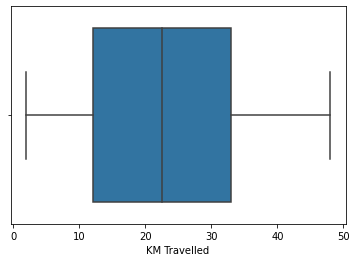

In [160]:
sns.boxplot(df2['KM Travelled'])

<AxesSubplot:title={'center':'KM Travelled'}, xlabel='Company'>

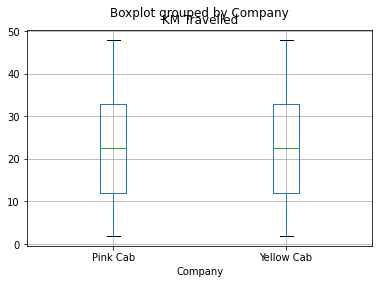

In [112]:
df2.boxplot(column=['KM Travelled'], by='Company')

C:\Users\Dakshith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost of Trip'>

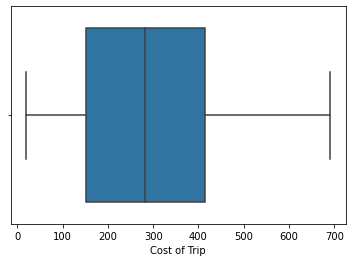

In [161]:
sns.boxplot(df2['Cost of Trip'])

<AxesSubplot:title={'center':'Cost of Trip'}, xlabel='Company'>

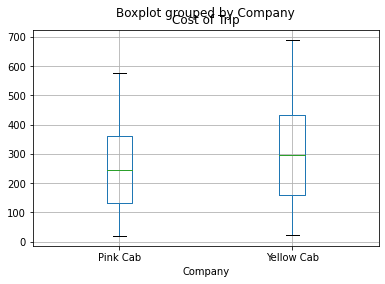

In [110]:
df2.boxplot(column=['Cost of Trip'], by='Company')

In [ ]:
sns.boxplot(df2['Price Charged'])

<AxesSubplot:title={'center':'Price Charged'}, xlabel='Company'>

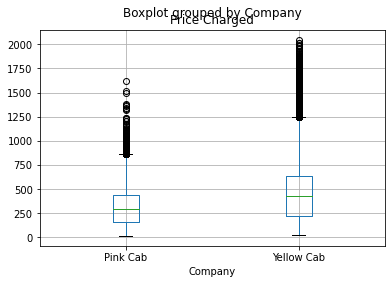

In [111]:
df2.boxplot(column=['Price Charged'], by='Company')

<AxesSubplot:title={'center':'Profit'}, xlabel='Company'>

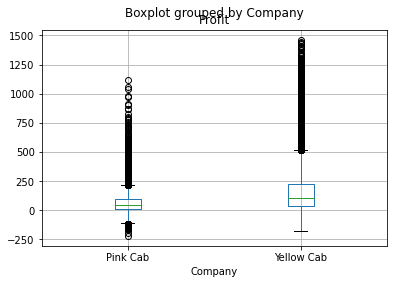

In [113]:
df2.boxplot(column=['Profit'], by='Company')

<AxesSubplot:title={'center':'Price per KM'}, xlabel='Company'>

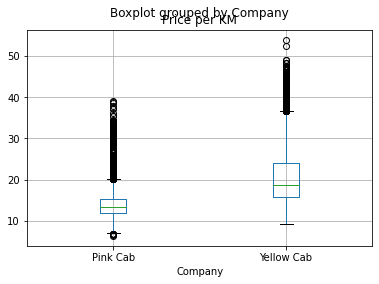

In [115]:
df2.boxplot(column=['Price per KM'], by='Company')

In [142]:
#we will  treat outliers of Price Charged by finding out the outliers and replacing their values with upper cap value i.e 90 percentile values

In [143]:
outliers = []
data = [] 
def detect_outliers_iqr(data):
    data = sorted(data)
    #print(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    print(q1,q3)
    IQR = q3 - q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound,upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers



In [144]:
Price_charged_list = df2["Price Charged"].tolist()
Price_charged_outliers = detect_outliers_iqr(Price_charged_list)


206.4375 583.66
-359.39625 1149.49375


In [145]:
len(Price_charged_outliers)

5958

In [146]:
median=np.median(Price_charged_list)

In [147]:
median

386.36

In [148]:
ninetieth_percentile=np.percentile(Price_charged_list,90)
print(ninetieth_percentile)

b=np.where(Price_charged_list>ninetieth_percentile,ninetieth_percentile,Price_charged_list)
#print(Price_charged_list)

792.79


In [149]:
Price_charged_list=b

In [150]:
temp_df=pd.DataFrame(Price_charged_list,columns = ['Price Charged'])

In [151]:
temp_df.shape

(359392, 1)

In [152]:
df2.shape

(359392, 19)

In [154]:
df2['Price Charged']=temp_df['Price Charged']

C:\Users\Dakshith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price Charged'>

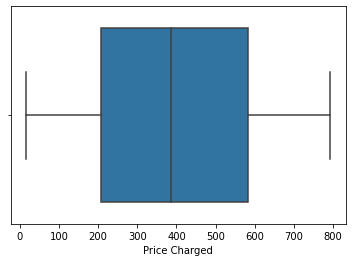

In [155]:
sns.boxplot(df2['Price Charged'])

In [156]:
# There are no outliers after outlier treatment of Price Charged

In [157]:
#Now we will recalculate Profit and Price per KM 

In [158]:
df2['Profit']=df2['Price Charged']-df2['Cost of Trip']

In [159]:
df2['Price per KM']=df2['Price Charged']/df2['KM Travelled']

<AxesSubplot:title={'center':'Price Charged'}, xlabel='Company'>

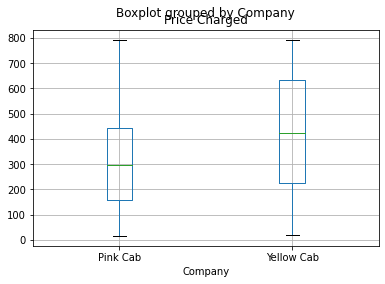

In [163]:
df2.boxplot(column=['Price Charged'], by='Company')

<AxesSubplot:title={'center':'Profit'}, xlabel='Company'>

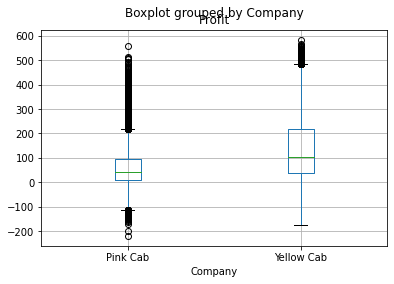

In [164]:
df2.boxplot(column=['Profit'], by='Company')

<AxesSubplot:title={'center':'Price per KM'}, xlabel='Company'>

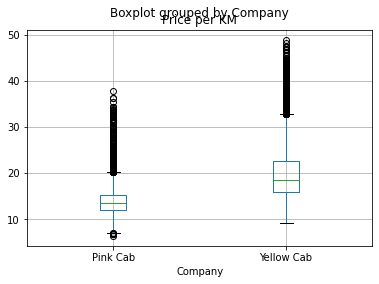

In [166]:
df2.boxplot(column=['Price per KM'], by='Company')

In [167]:
#By looking at above plots it shows that Profit and Price per KM still have outliers after treating the Price Charged outliers on which
#they are dependent.So i assume that these outliers are due to overly Charged price for some users for luxury cars and services.so i leave them as such
# and continue my analysis further

In [168]:
# Now we will check the counts of Categorical Data one by one

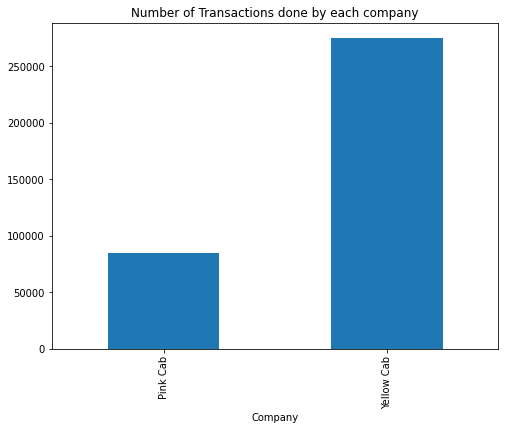

In [170]:
ax = df2.groupby('Company')['Transaction ID'].count().plot(kind='bar',
                                    figsize=(8,6),
                                    title="Number of Transactions done by each company")

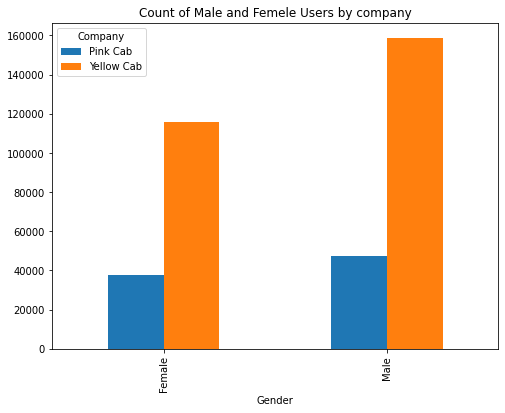

In [178]:
ax=df2.groupby(['Company','Gender'])['Gender'].count().unstack(0).plot(kind='bar',
                                    figsize=(8,6),
                                    title="Count of Male and Femele Users by company")

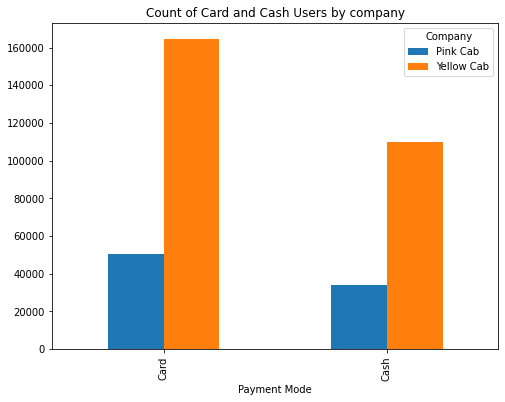

In [179]:
ax=df2.groupby(['Company','Payment Mode'])['Payment Mode'].count().unstack(0).plot(kind='bar',
                                    figsize=(8,6),
                                    title="Count of Card and Cash Users by company")

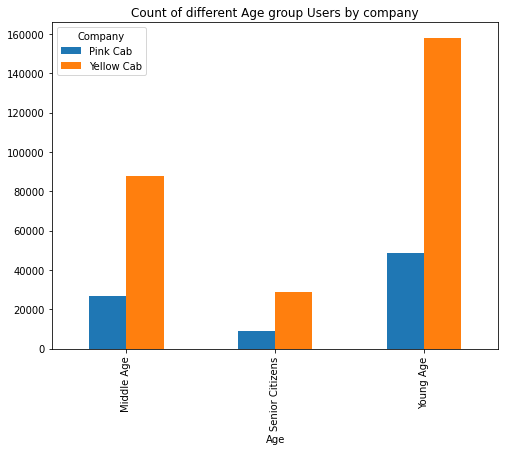

In [180]:
ax=df2.groupby(['Company','Age'])['Age'].count().unstack(0).plot(kind='bar',
                                    figsize=(8,6),
                                    title="Count of different Age group Users by company")

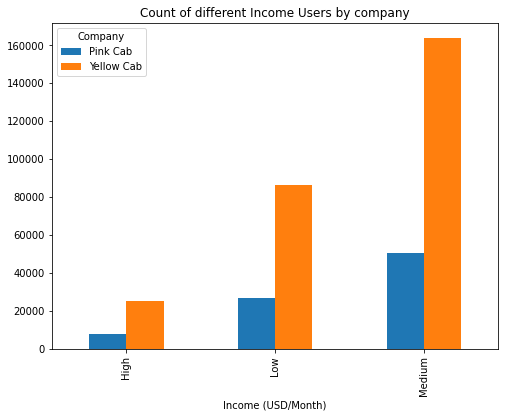

In [182]:
ax=df2.groupby(['Company','Income (USD/Month)'])['Income (USD/Month)'].count().unstack(0).plot(kind='bar',
                                    figsize=(8,6),
                                    title="Count of different Income Users by company")

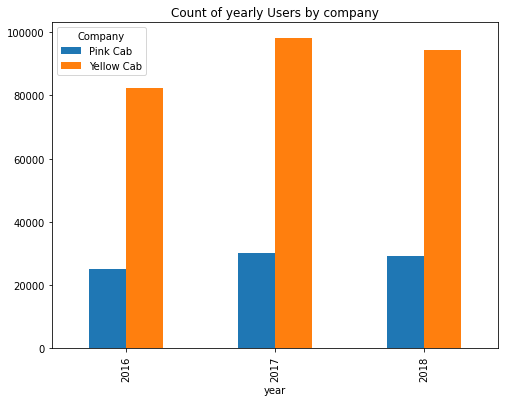

In [183]:
ax=df2.groupby(['Company','year'])['year'].count().unstack(0).plot(kind='bar',
                                    figsize=(8,6),
                                    title="Count of yearly Users by company")

In [ ]:
# By looking at all above plots we can say there is same Proportionality in both the companies in all the catagories of users.

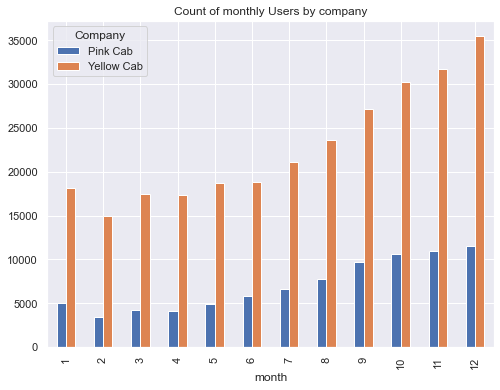

In [221]:
ax=df2.groupby(['Company','month'])['month'].count().unstack(0).plot(kind='bar',
                                    figsize=(8,6),
                                    title="Count of monthly Users by company")

In [222]:
#by above plot we can say that there is a sesonality in number of cab users in both the companies indicating more usage of cabs in end of the year due to christmas and new year holidays and celebration and low usage in the begining of the year due to winter season.

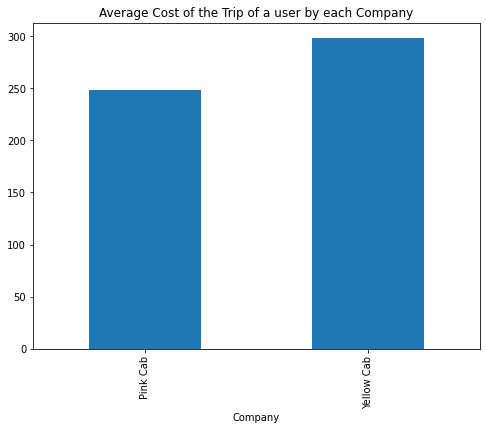

In [196]:
ax=df2.groupby('Company')['Cost of Trip'].mean().plot(kind='bar',
                                    figsize=(8,6),
                                    title="Average Cost of the Trip of a user by each Company")

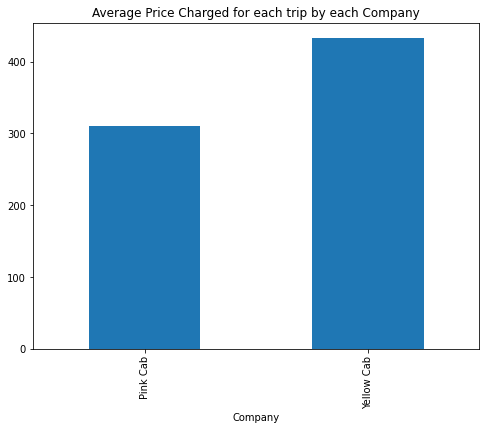

In [197]:
ax=df2.groupby('Company')['Price Charged'].mean().plot(kind='bar',
                                    figsize=(8,6),
                                    title="Average Price Charged for each trip by each Company")

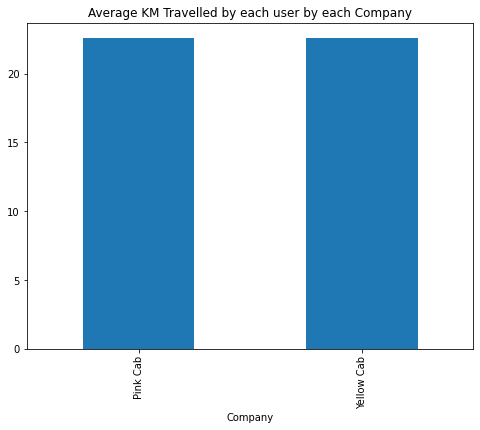

In [198]:
ax=df2.groupby('Company')['KM Travelled'].mean().plot(kind='bar',
                                    figsize=(8,6),
                                    title="Average KM Travelled by each user by each Company")

In [199]:
#From Above graphs we can say there is an average Profit margin of 100 dollars from each user in yellow cab company and 50 dollars in Pink cab company

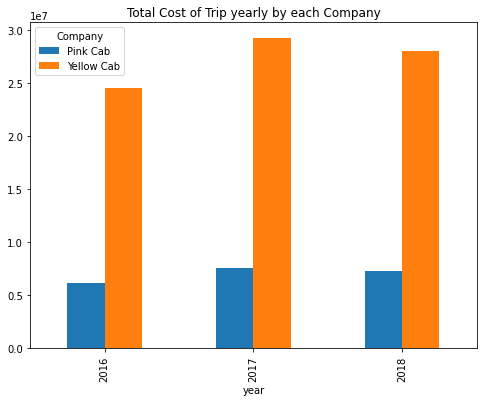

In [211]:
ax=df2.groupby(['Company','year'])['Cost of Trip'].sum().unstack(0).plot.bar(
                                    figsize=(8,6),
                                    title="Total Cost of Trip yearly by each Company")

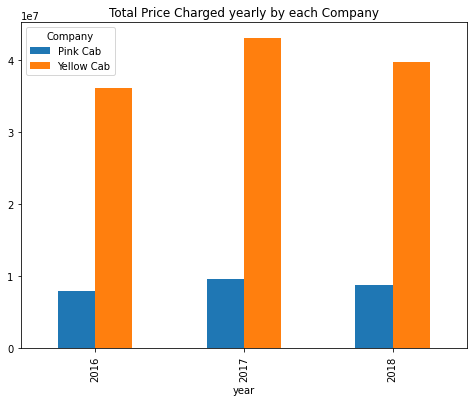

In [212]:
sax=df2.groupby(['Company','year'])['Price Charged'].sum().unstack(0).plot.bar(
                                    figsize=(8,6),
                                    title="Total Price Charged yearly by each Company")

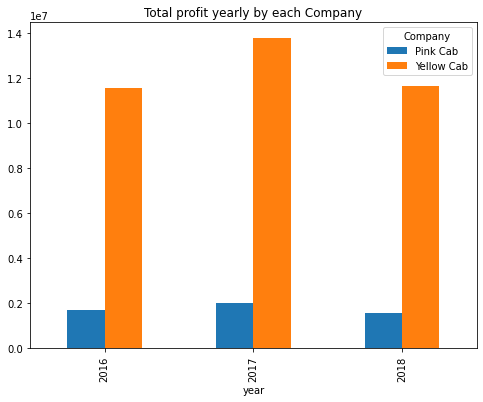

In [205]:
ax=df2.groupby(['Company','year'])['Profit'].sum().unstack(0).plot.bar(
                                    figsize=(8,6),
                                    title="Total profit yearly by each Company")

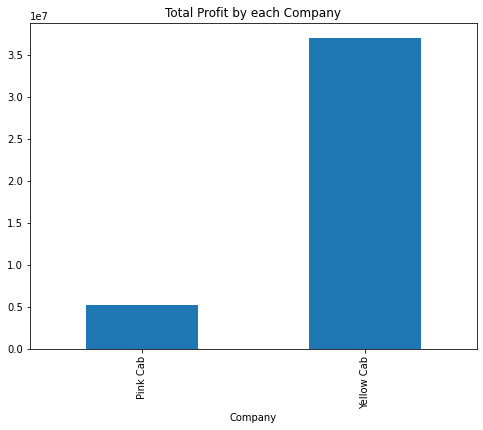

In [206]:
ax=df2.groupby('Company')['Profit'].sum().plot(kind='bar',
                                    figsize=(8,6),
                                    title="Total Profit by each Company")

In [204]:
#The Total profit and yearly Profit of Yellowcab Company is more than Pink Cab Company

In [213]:
#Next we will analyse Users in each city and there population

[Text(0, 0, 'NEW YORK'),
 Text(1, 0, 'CHICAGO'),
 Text(2, 0, 'LOS ANGELES'),
 Text(3, 0, 'MIAMI'),
 Text(4, 0, 'SILICON VALLEY'),
 Text(5, 0, 'ORANGE COUNTY'),
 Text(6, 0, 'SAN DIEGO'),
 Text(7, 0, 'PHOENIX'),
 Text(8, 0, 'DALLAS'),
 Text(9, 0, 'ATLANTA'),
 Text(10, 0, 'DENVER'),
 Text(11, 0, 'AUSTIN'),
 Text(12, 0, 'SEATTLE'),
 Text(13, 0, 'TUCSON'),
 Text(14, 0, 'SAN FRANCISCO'),
 Text(15, 0, 'SACRAMENTO'),
 Text(16, 0, 'PITTSBURGH'),
 Text(17, 0, 'WASHINGTON'),
 Text(18, 0, 'NASHVILLE'),
 Text(19, 0, 'BOSTON')]

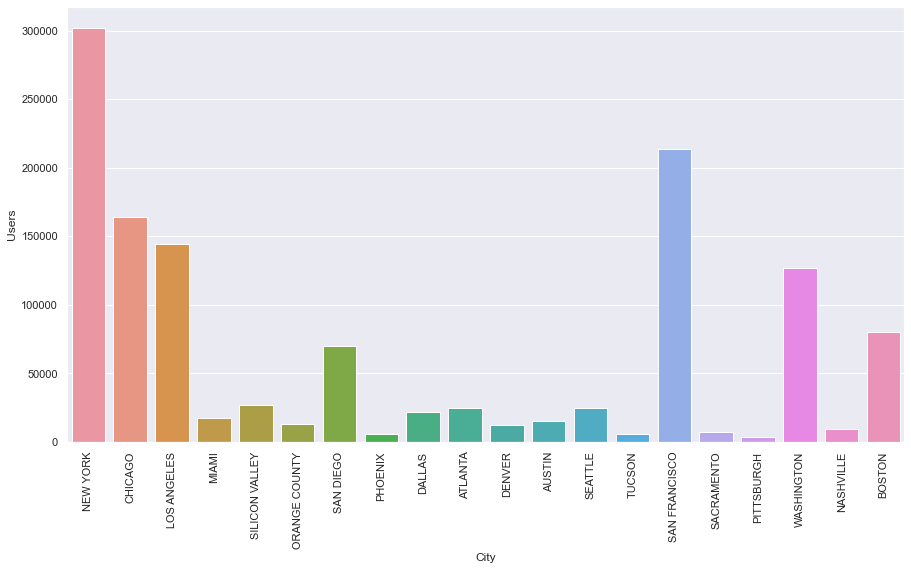

In [214]:
sns.set(rc = {'figure.figsize':(15,8)})
#sns.barplot(x="City",y="Users",data=city_df)
ax=sns.barplot(x=city_df['City'],y=city_df['Users'])
ax.set_xticklabels(city_df['City'],rotation=90)

[Text(0, 0, 'NEW YORK'),
 Text(1, 0, 'CHICAGO'),
 Text(2, 0, 'LOS ANGELES'),
 Text(3, 0, 'MIAMI'),
 Text(4, 0, 'SILICON VALLEY'),
 Text(5, 0, 'ORANGE COUNTY'),
 Text(6, 0, 'SAN DIEGO'),
 Text(7, 0, 'PHOENIX'),
 Text(8, 0, 'DALLAS'),
 Text(9, 0, 'ATLANTA'),
 Text(10, 0, 'DENVER'),
 Text(11, 0, 'AUSTIN'),
 Text(12, 0, 'SEATTLE'),
 Text(13, 0, 'TUCSON'),
 Text(14, 0, 'SAN FRANCISCO'),
 Text(15, 0, 'SACRAMENTO'),
 Text(16, 0, 'PITTSBURGH'),
 Text(17, 0, 'WASHINGTON'),
 Text(18, 0, 'NASHVILLE'),
 Text(19, 0, 'BOSTON')]

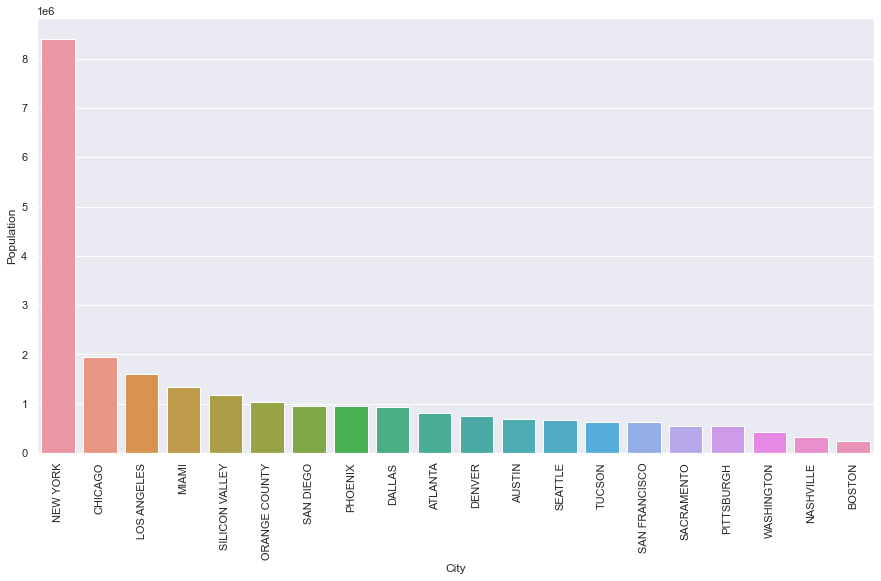

In [215]:
sns.set(rc = {'figure.figsize':(15,8)})
ax=sns.barplot(x=city_df['City'],y=city_df['Population'])
ax.set_xticklabels(city_df['City'],rotation=90)

In [216]:
# From the above graphs we can see Newyork,Washington,Sanfransisco,chicago and Losangels are having more cab users and population wise also Newyork,Chocago and Losangels are in the top.
#Lets Analyse the Users by company among the cities

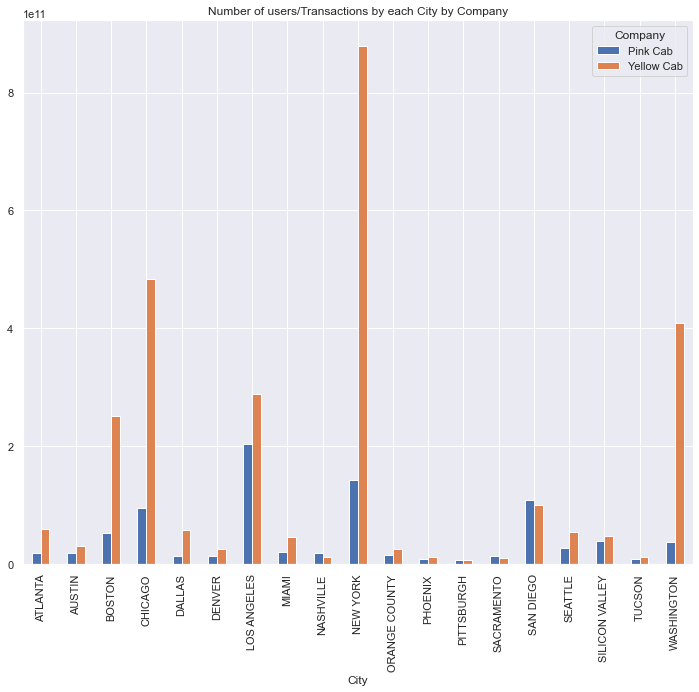

In [220]:
ax=df2.groupby(['Company','City'])['Transaction ID'].sum().unstack(0).plot.bar(
                                    figsize=(12,10),
                                    title="Number of users/Transactions by each City by Company")

In [ ]:
#By above plot we can say that Yellow cab company is doing good bussiness in top cities which has more cab users and has more Population like Newyork,Chicago,Loasangels and washington than Pink Cab company.